In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("https://www.ishelp.info/data/MPG.csv")
df.head()
df.drop('Name', axis=1, inplace=True)

Complete the following tasks and then answer the associated questions below:

Create a DataFrame that contains the following properties and statistics of all features in the MPG.csv dataset:
Count
Quantiles(.25, .5, .75)
Mean
Median
Mode
Min
Max
Standard Deviation
Kurtosis
Skewness
Input these statistics into a DataFrame
Use the same dataset mpg.csv. Create a histogram for Acceleration using either Matplotlib or Seaborn
x-axis should be acceleration and y-axis should be count
The bin count should follow the cubed root of n rule
Include the standard deviation, mean, skewness, and kurtosis as text on top of the histogram.
Give the histogram a proper title and label axes correctly
Embed your full name somewhere in the visualization 
It should look somethink like this:

Create a stacked plot (histogram with a boxplot) using the Seaborn package
Import the correct libraries you will need seaborn, pandas and pyplot (from matplotlib)
You should create a boxplot that has cylinders as the y-axis and acceleration as the x-axis. Adjust sizes so that it looks clean and readable.
Build a histogram for Acceleration that is divided by different numbers of Cylinders, but only inlcude cars with 4 and 8 cylinders. You may consider reviewing the chapter on how to filter DataFrames for how to do this
HINT: consider using the orient="" parameter of the Seaborn .boxplot() object to make this look right. See documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html
Embed your full name somewhere in the visualization
It should look something like this:


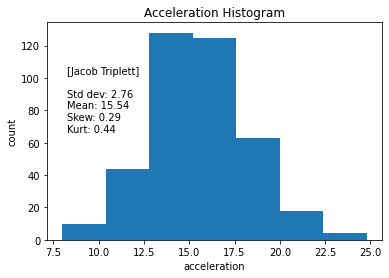

,MPG,Cylinders,Displacement,Horse_Power,Weight,Acceleration,Model_Year
count,392,392,392,392,392,392,392
25%,17,4,105,75,2225.25,13.775,73
50%,22.75,4,151,93.5,2803.5,15.5,76
75%,29,8,275.75,126,3614.75,17.025,79
mean,23.4459,5.47194,194.412,104.469,2977.58,15.5413,75.9796
median,22.75,4,151,93.5,2803.5,15.5,76
mode,13,4,97,150,1985,14.5,73
min,9,3,68,46,1613,8,70
max,46.6,8,455,230,5140,24.8,82
standard deviation,7.80501,1.70578,104.644,38.4912,849.403,2.75886,3.68374


In [ ]:
statsDF = pd.DataFrame(columns=[df.columns], index=['count', '25%', '50%', '75%', 'mean', 'median', 'mode', 'min', 'max', 'standard deviation', 'kurtosis', 'skew'])

statsDF.loc['count'] = list(df.count())
statsDF.loc['25%'] = list(df.quantile(.25))
statsDF.loc['50%'] = list(df.quantile(.50))
statsDF.loc['75%'] = list(df.quantile(.75))
statsDF.loc['mean'] = list(df.mean())
statsDF.loc['median'] = list(df.median())
statsDF.loc['mode'] = list(df.mode().values[0])
statsDF.loc['min'] = list(df.min())
statsDF.loc['max'] = list(df.max())
statsDF.loc['standard deviation'] = list(df.std())
statsDF.loc['kurtosis'] = list(df.kurt())
statsDF.loc['skew'] = list(df.skew())

plt.hist(df.Acceleration, bins=int(round(df.Acceleration.count()**(1/3), 0)))
plt.title('Acceleration Histogram')
plt.xlabel('acceleration')
plt.ylabel('count')

text = '[Jacob Triplett]' + '\n\n'
text += 'Std dev: ' + str(round(df.Acceleration.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.Acceleration.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.Acceleration.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.Acceleration.kurt(), 2))
plt.text(0.17, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
plt.show()

statsDF

     MPG  Cylinders  Displacement  ...  Weight  Acceleration  Model_Year
14  24.0          4         113.0  ...    2372          15.0          70
18  27.0          4          97.0  ...    2130          14.5          70
19  26.0          4          97.0  ...    1835          20.5          70
20  25.0          4         110.0  ...    2672          17.5          70
21  24.0          4         107.0  ...    2430          14.5          70

[5 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


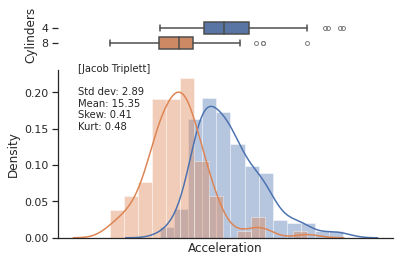

In [ ]:
import seaborn as sns

df1 = df[df['Cylinders'] == 4] 
df2 = df[df['Cylinders'] == 8]
combo_df = pd.concat([df1, df2], axis=0)
df = combo_df
print(df.head())

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.set(style='ticks')

outlier_format = dict(marker='o', markerfacecolor='none', markersize=4, linestyle='none', markeredgecolor='gray')
sns.boxplot(x=df.Acceleration, y=df.Cylinders, ax=ax_box, fliersize=4, flierprops=outlier_format, orient='h')

sns.distplot(df[df['Cylinders']==4].Acceleration, ax=ax_hist)
sns.distplot(df[df['Cylinders']==8].Acceleration, ax=ax_hist)

ax_box.set(xticks=[])
ax_box.set_xlabel('')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True, bottom=True)

text = '[Jacob Triplett]' + '\n\n'
text += 'Std dev: ' + str(round(df.Acceleration.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.Acceleration.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.Acceleration.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.Acceleration.kurt(), 2))
plt.text(0.17, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)

plt.show()